In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
hr=pd.read_csv('Documents/HR-Employee-Attrition.csv')

In [3]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
hr.sample()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
486,37,No,Travel_Rarely,558,Sales,2,3,Marketing,1,656,...,3,80,1,17,3,2,3,0,1,0


In [6]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
hr.shape

(1470, 35)

In [8]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
hr=pd.DataFrame(data=hr)

In [12]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [13]:
hr.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
hr.iloc[0,:]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [16]:
print(hr.isna().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<AxesSubplot:>

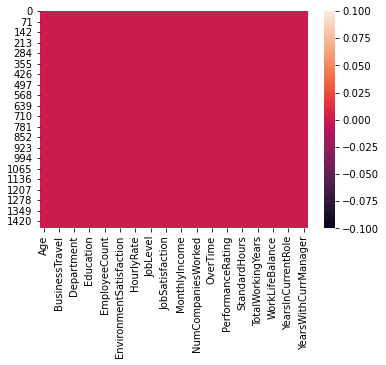

In [17]:
sns.heatmap(hr.isnull())

In [18]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

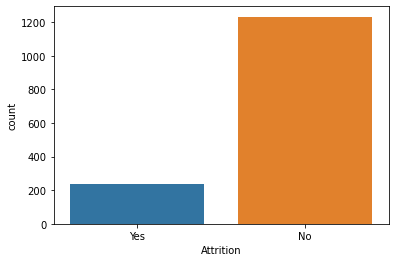

In [19]:
sns.countplot(hr['Attrition'])

In [20]:
for column in hr.columns:
    print (f"{column}: Number of unique values {hr[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [21]:
hr.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis="columns",inplace=True)

In [22]:
for column in hr.columns:
    if hr[column].dtype ==object:
        print(str(column)+':'+ str(hr[column].unique()))
        print (hr[column].value_counts())
        print ('*****************************************************************************************************')

Attrition:['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
*****************************************************************************************************
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*****************************************************************************************************
Department:['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
*****************************************************************************************************
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: Ed

In [23]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [24]:
disc_col = []
for column in hr.columns:
    if hr[column].dtypes != object and hr[column].nunique() < 30:
        print(f"{column} : {hr[column].unique()}")
        disc_col.append(column)
        print("**************************************************************************************")

DistanceFromHome : [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
**************************************************************************************
Education : [2 1 4 3 5]
**************************************************************************************
EnvironmentSatisfaction : [2 3 4 1]
**************************************************************************************
JobInvolvement : [3 2 4 1]
**************************************************************************************
JobLevel : [2 1 3 4 5]
**************************************************************************************
JobSatisfaction : [4 2 3 1]
**************************************************************************************
NumCompaniesWorked : [8 1 6 9 0 4 5 2 7 3]
**************************************************************************************
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
**********************************

In [25]:
cont_col = []
for column in hr.columns:
    if hr[column].dtypes != object and hr[column].nunique() > 30:
        print(f"{column} : Minimum: {hr[column].min()}, Maximum: {hr[column].max()}")
        cont_col.append(column)

Age : Minimum: 18, Maximum: 60
DailyRate : Minimum: 102, Maximum: 1499
HourlyRate : Minimum: 30, Maximum: 100
MonthlyIncome : Minimum: 1009, Maximum: 19999
MonthlyRate : Minimum: 2094, Maximum: 26999
TotalWorkingYears : Minimum: 0, Maximum: 40
YearsAtCompany : Minimum: 0, Maximum: 40


In [26]:
for column in hr.columns:
    if hr[column].dtype ==np.number:
        continue
    hr[column] = LabelEncoder().fit_transform(hr[column])

<ipython-input-26-49faf1d12547>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if hr[column].dtype ==np.number:


In [27]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,2,1,...,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,3,1,...,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1,1,...,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,3,1,...,0,3,0,17,3,1,9,6,0,8


<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

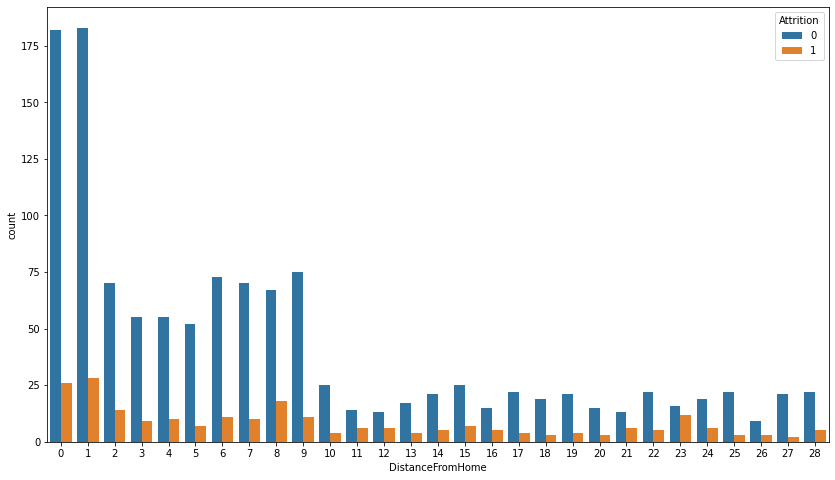

In [28]:
# Distance from Home
plt.subplots(figsize=(14,8))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=hr)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

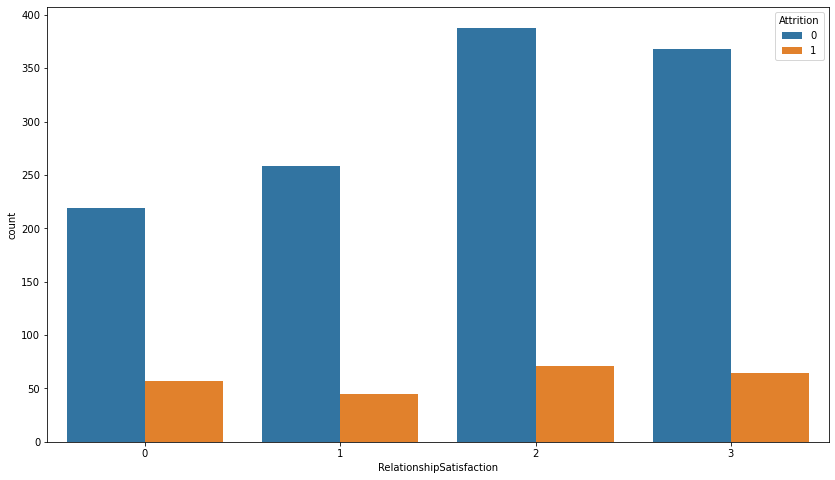

In [29]:
# Relationship Satisfaction
plt.subplots(figsize=(14,8))
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=hr)

<AxesSubplot:xlabel='Age', ylabel='count'>

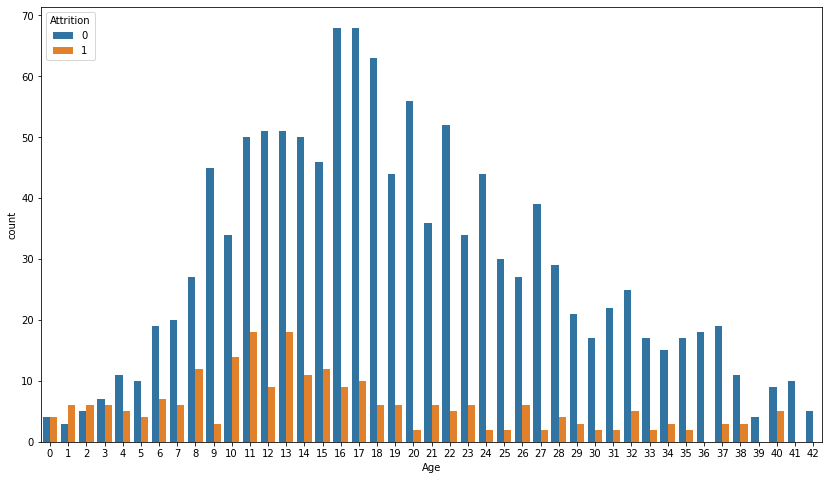

In [30]:
# Number of employee that left and stayed by age
plt.subplots(figsize=(14,8))
sns.countplot(x='Age', hue='Attrition', data=hr)

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

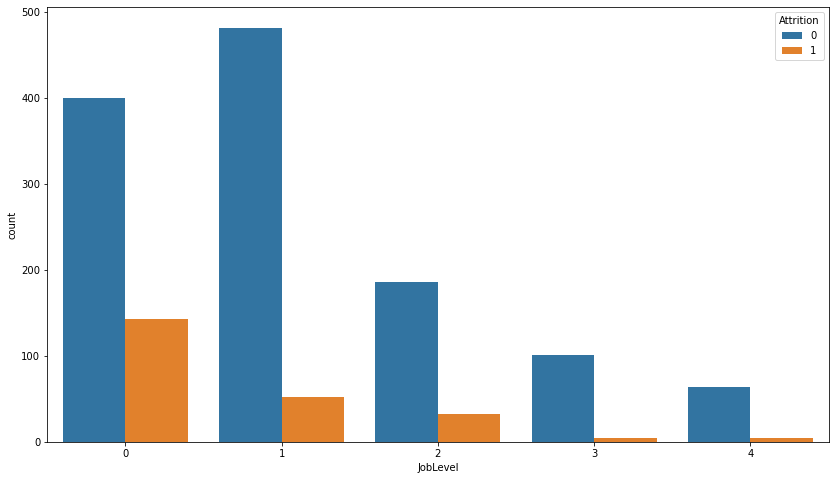

In [31]:
# Does Job level affects it?
plt.subplots(figsize=(14,8))
sns.countplot(x='JobLevel', hue='Attrition', data=hr)

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

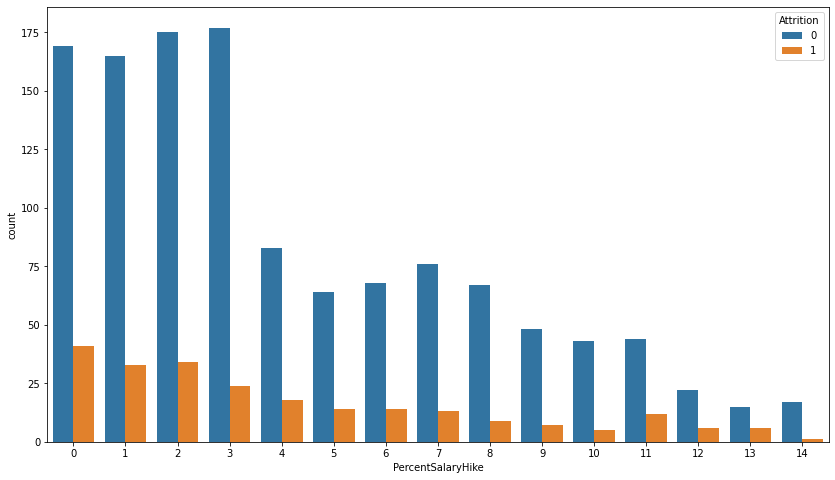

In [32]:
# Percentage Salary Hike
plt.subplots(figsize=(14,8))
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=hr)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

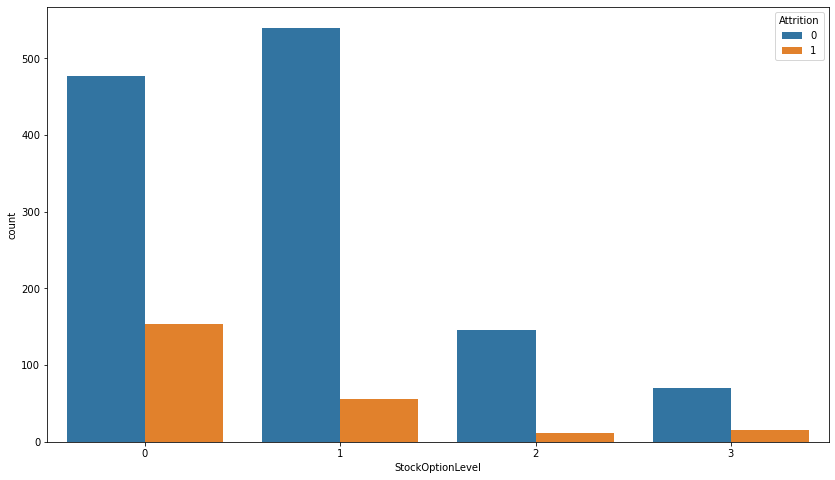

In [33]:
# Stock Option
plt.subplots(figsize=(14,8))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=hr)

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

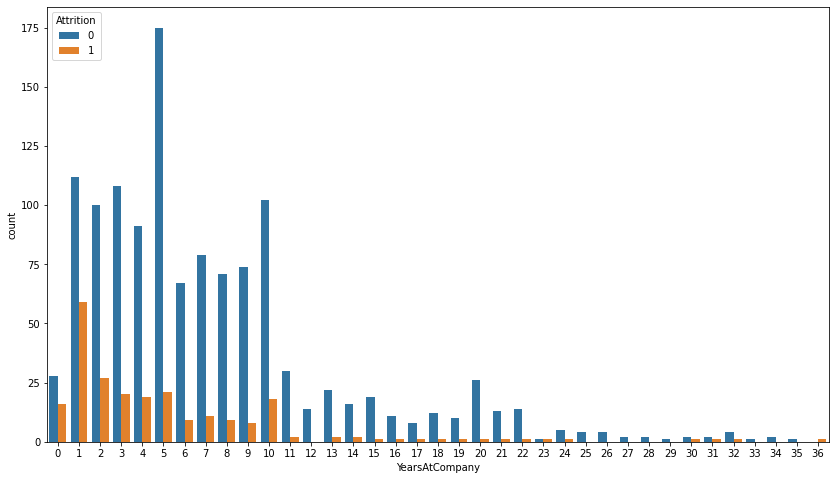

In [34]:
# Year at the Company
plt.subplots(figsize=(14,8))
sns.countplot(x='YearsAtCompany', hue='Attrition', data=hr)

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

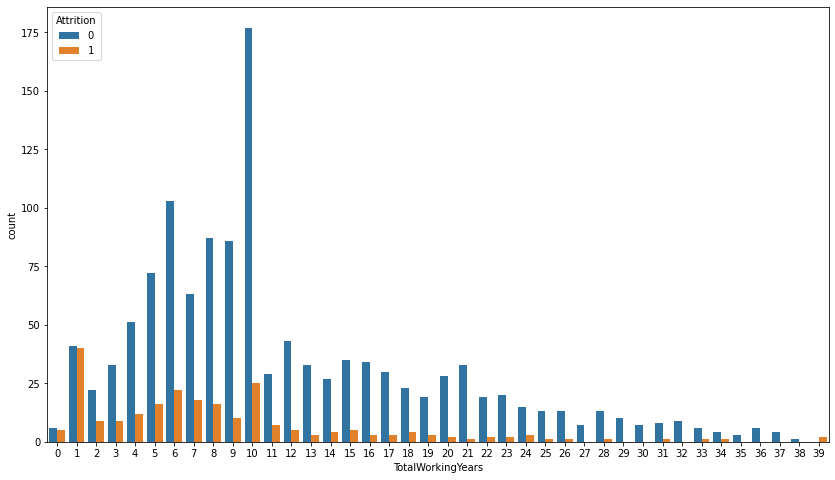

In [35]:
# Total Working Years
plt.subplots(figsize=(14,8))
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=hr)

<AxesSubplot:xlabel='Gender', ylabel='count'>

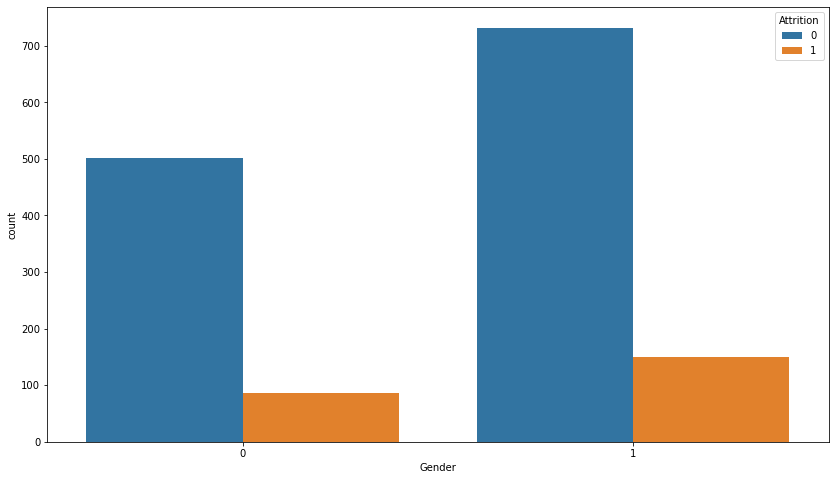

In [36]:
# Gender 
plt.subplots(figsize=(14,8))
sns.countplot(x='Gender', hue='Attrition', data=hr)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

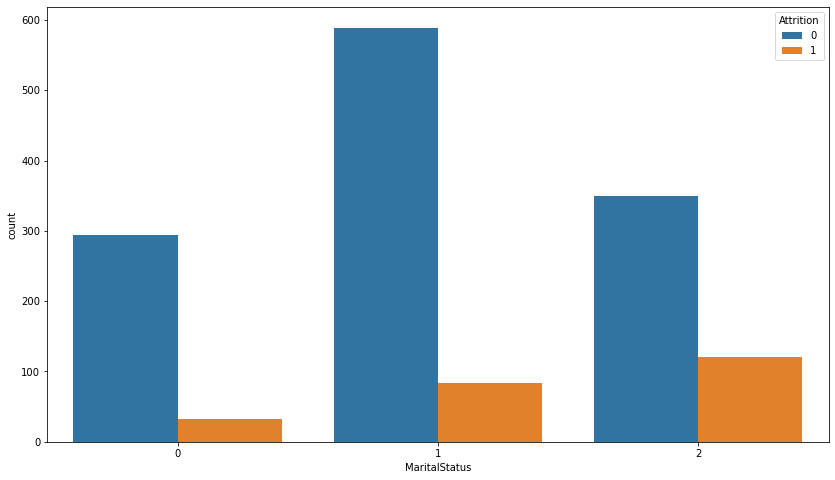

In [37]:
# Marital Status
plt.subplots(figsize=(14,8))
sns.countplot(x='MaritalStatus', hue='Attrition', data=hr)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

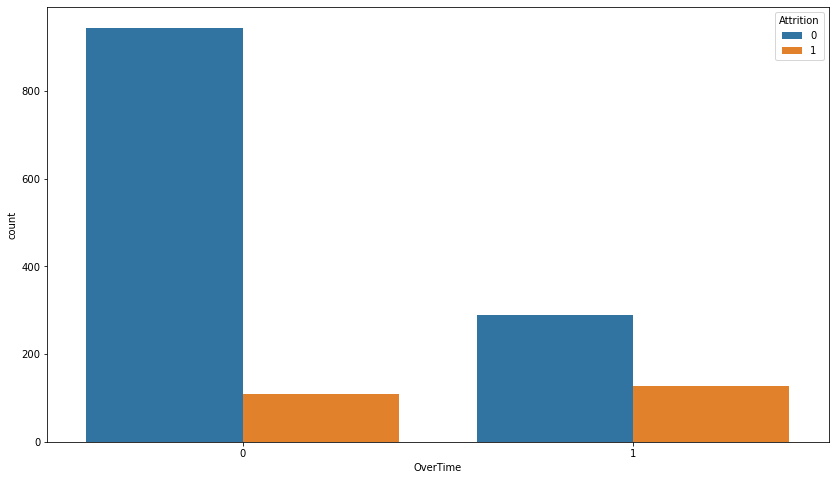

In [38]:
# Over Time
plt.subplots(figsize=(14,8))
sns.countplot(x='OverTime', hue='Attrition', data=hr)

<AxesSubplot:xlabel='Department', ylabel='count'>

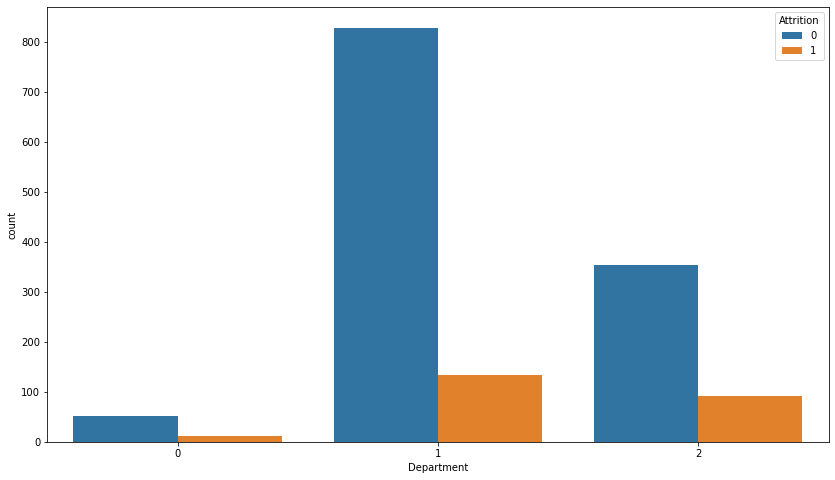

In [39]:
# Department
plt.subplots(figsize=(14,8))
sns.countplot(x='Department', hue='Attrition', data=hr)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

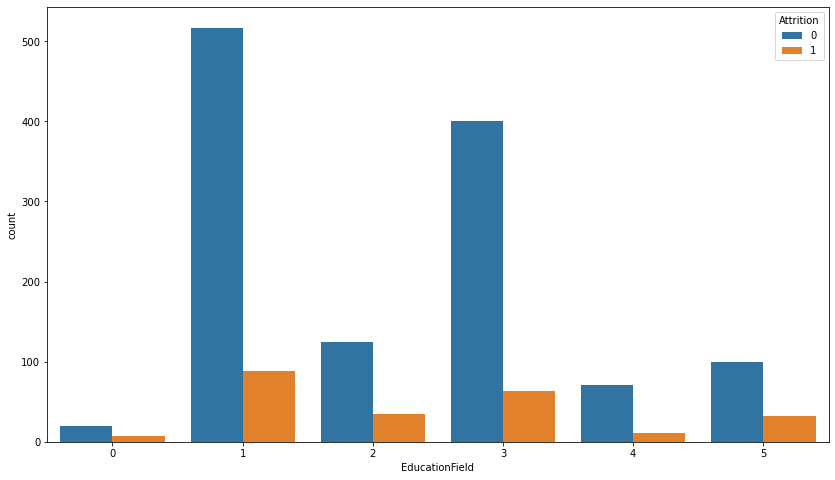

In [40]:
# Education Field
plt.subplots(figsize=(14,8))
sns.countplot(x='EducationField', hue='Attrition', data=hr)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

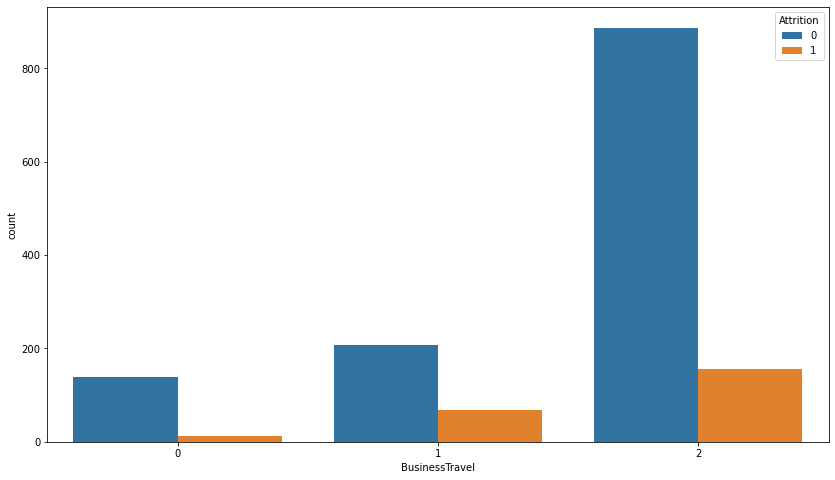

In [41]:
# Business Travel
plt.subplots(figsize=(14,8))
sns.countplot(x='BusinessTravel', hue='Attrition', data=hr)

<AxesSubplot:xlabel='DailyRate', ylabel='count'>

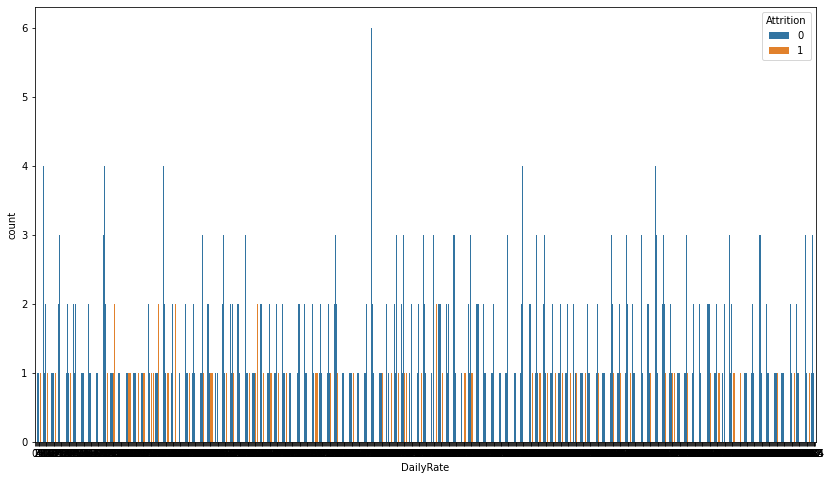

In [42]:
# Daily Rate
plt.subplots(figsize=(14,8))
sns.countplot(x='DailyRate', hue='Attrition', data=hr)

<AxesSubplot:xlabel='Education', ylabel='count'>

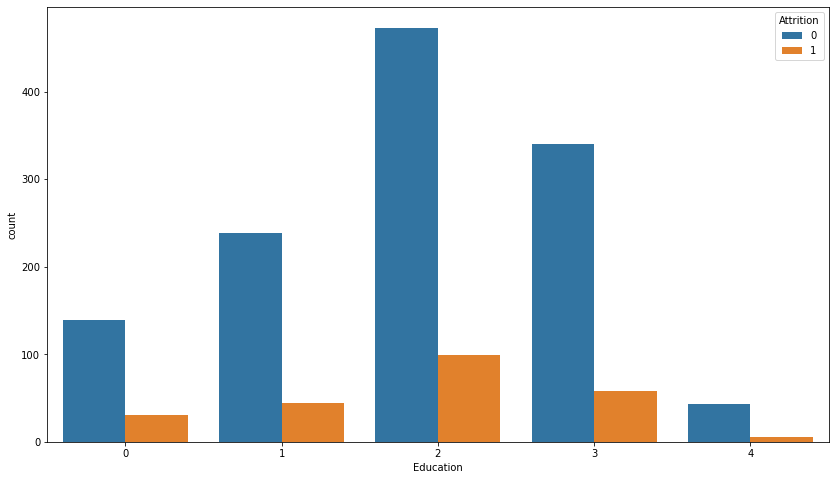

In [43]:
# Education
plt.subplots(figsize=(14,8))
sns.countplot(x='Education', hue='Attrition', data=hr)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

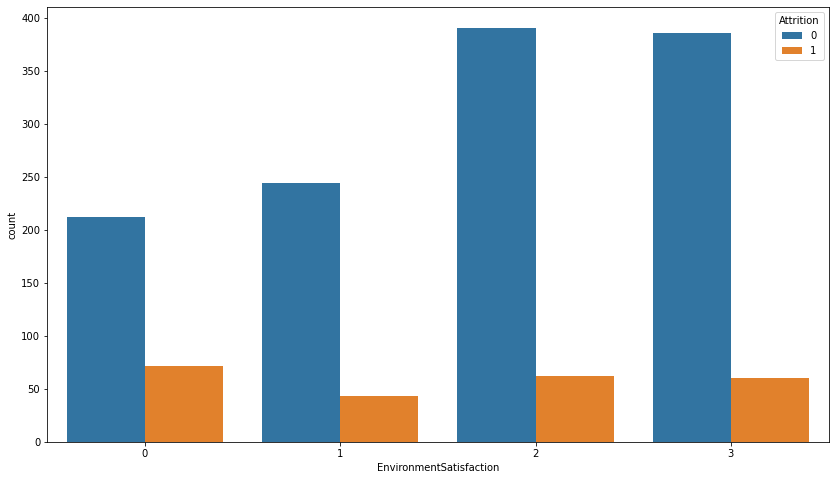

In [44]:
# Employee Number
plt.subplots(figsize=(14,8))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=hr)

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

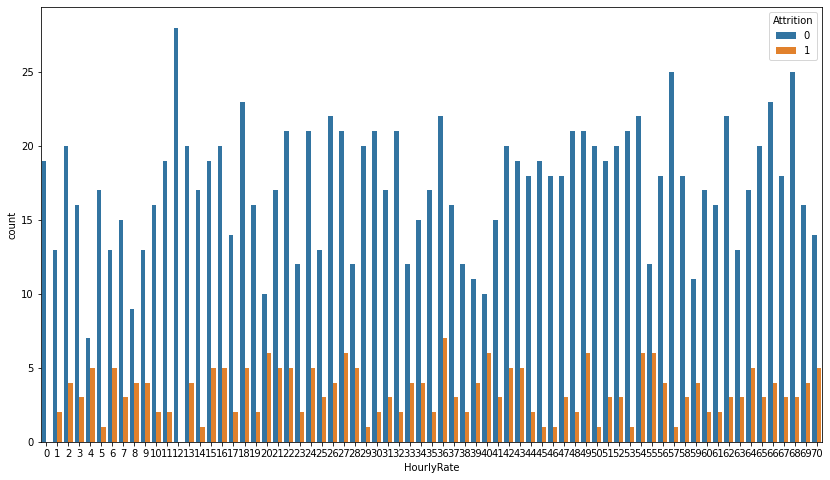

In [45]:
# Hourly Rate
plt.subplots(figsize=(14,8))
sns.countplot(x='HourlyRate', hue='Attrition', data=hr)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

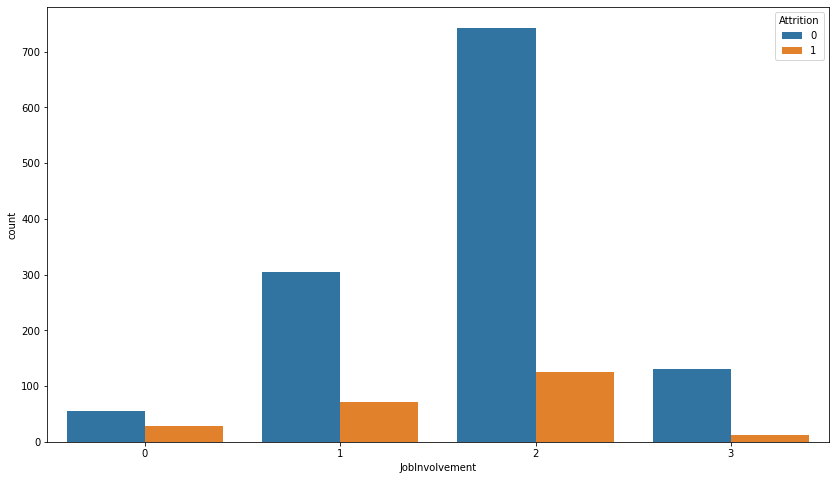

In [46]:
# JobInvolvement
plt.subplots(figsize=(14,8))
sns.countplot(x='JobInvolvement', hue='Attrition', data=hr)

<AxesSubplot:xlabel='JobRole', ylabel='count'>

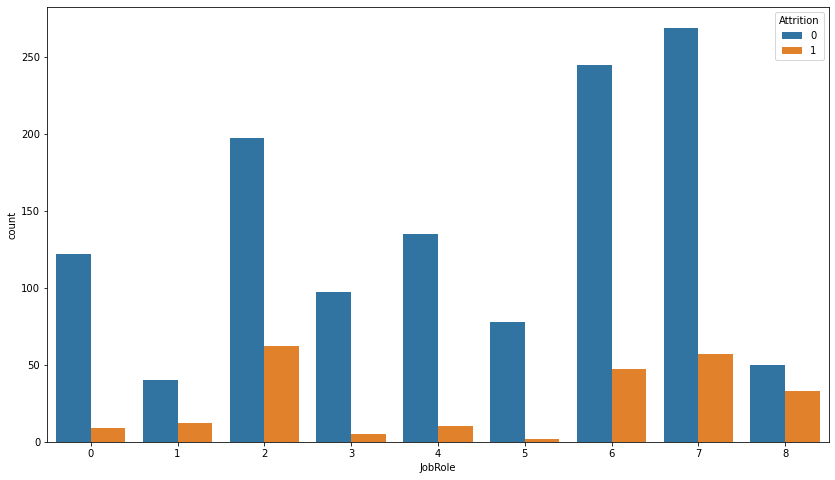

In [47]:
# Job Role
plt.subplots(figsize=(14,8))
sns.countplot(x='JobRole', hue='Attrition', data=hr)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

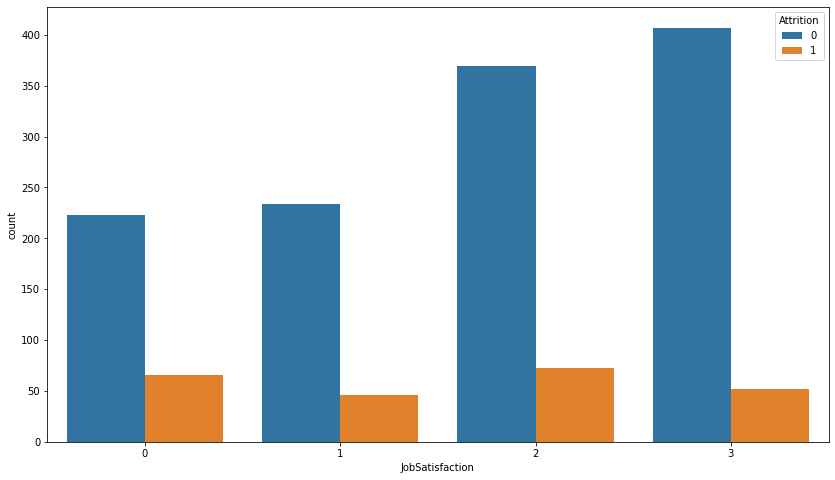

In [48]:
#Job Satisfaction
plt.subplots(figsize=(14,8))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=hr)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

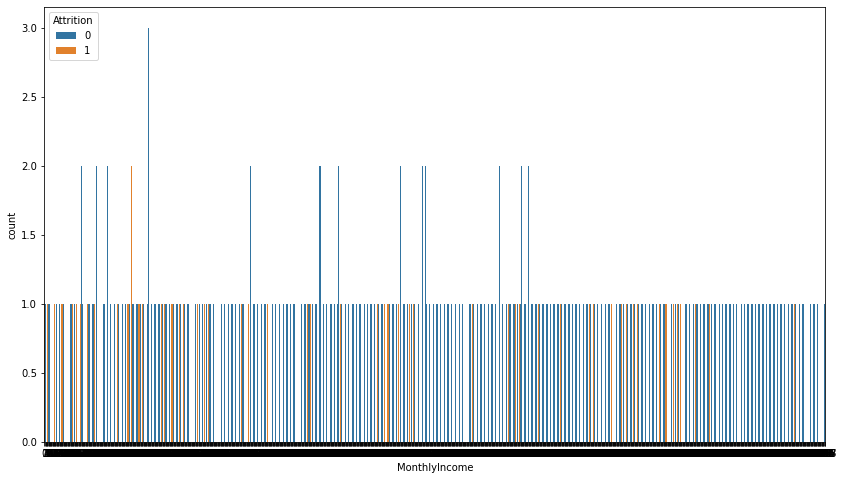

In [49]:
# Monthly Income
plt.subplots(figsize=(14,8))
sns.countplot(x='MonthlyIncome', hue='Attrition', data=hr)

<AxesSubplot:xlabel='MonthlyRate', ylabel='count'>

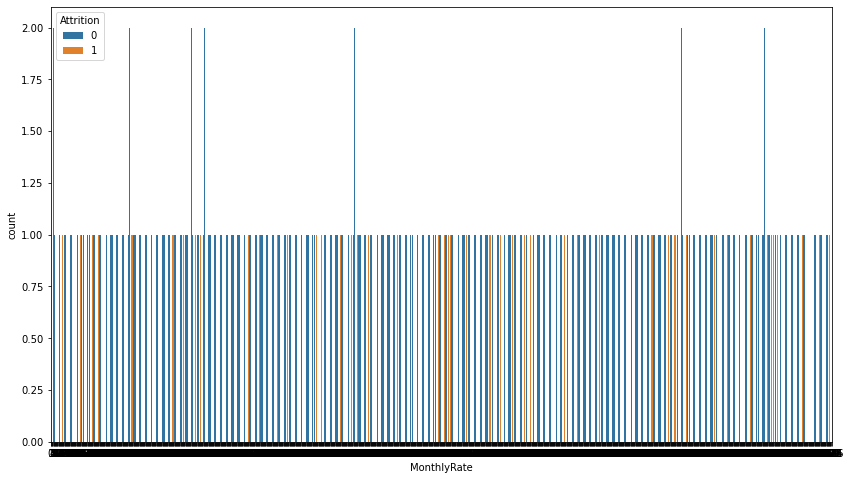

In [50]:
# Monthly Rate
plt.subplots(figsize=(14,8))
sns.countplot(x='MonthlyRate', hue='Attrition', data=hr)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

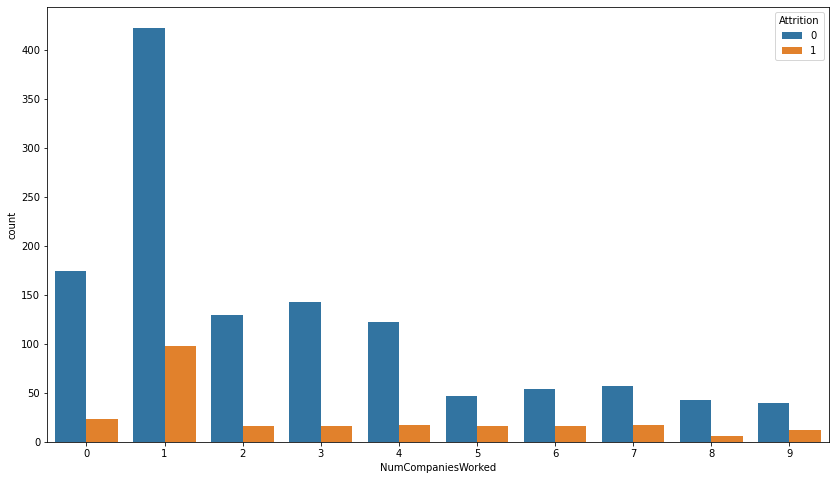

In [51]:
# Num Companies Worked
plt.subplots(figsize=(14,8))
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=hr)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

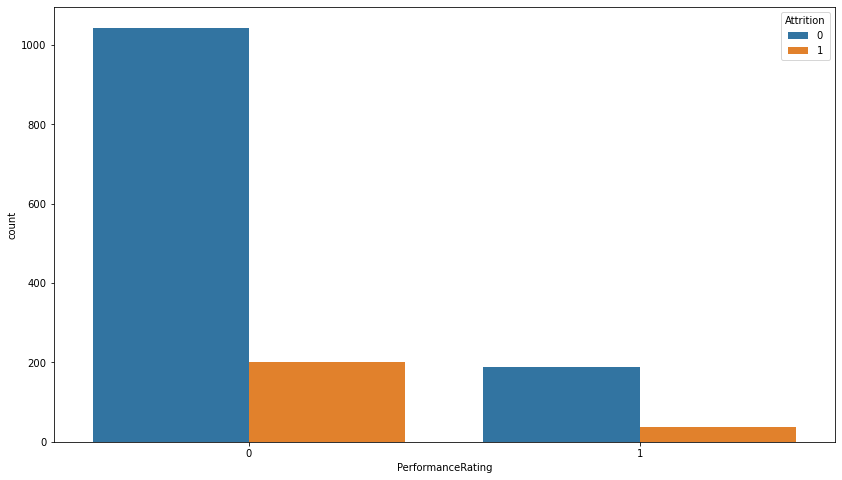

In [52]:
# Performance Rating
plt.subplots(figsize=(14,8))
sns.countplot(x='PerformanceRating', hue='Attrition', data=hr)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

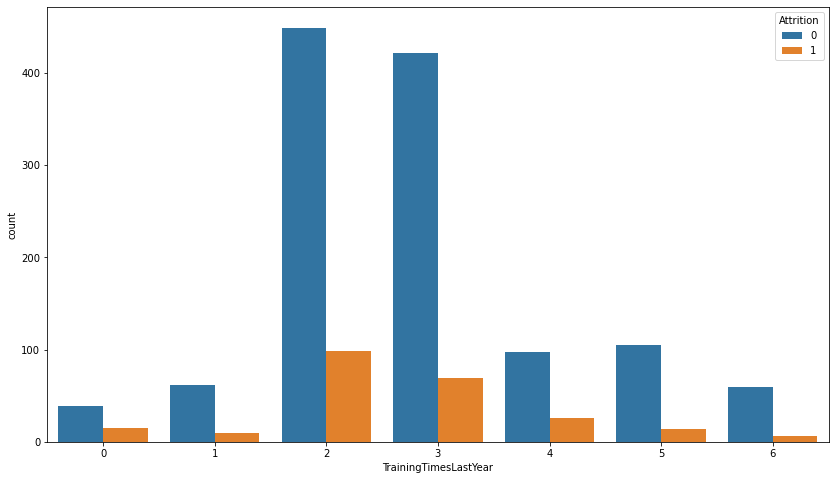

In [53]:
# Training Times Last Year
plt.subplots(figsize=(14,8))
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=hr)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

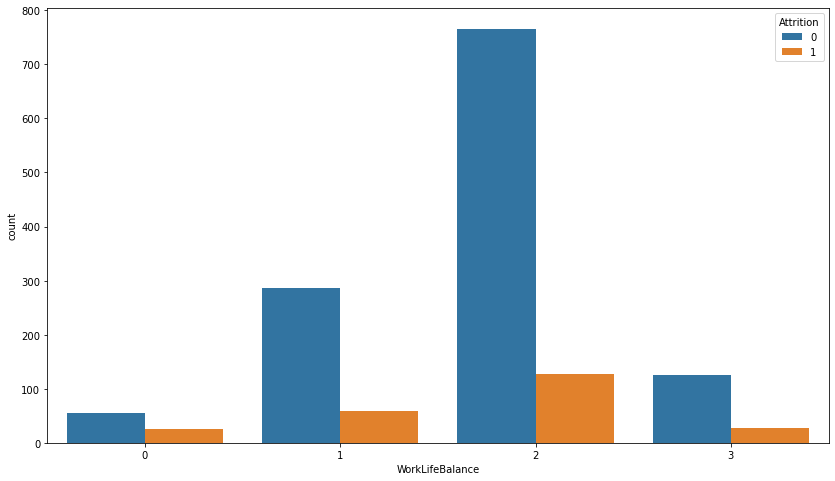

In [54]:
# Work Life Balance
plt.subplots(figsize=(14,8))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=hr)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

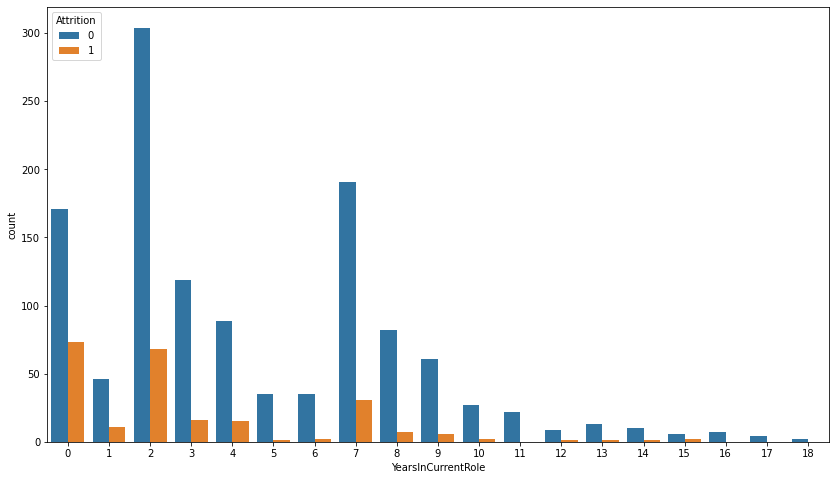

In [55]:
# Years In Current Role
plt.subplots(figsize=(14,8))
sns.countplot(x='YearsInCurrentRole', hue='Attrition', data=hr)

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

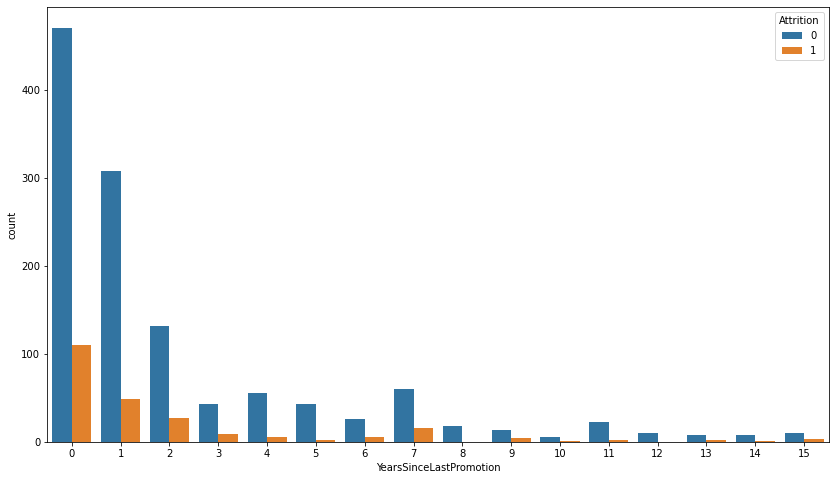

In [56]:
# Years Since Last Promotion
plt.subplots(figsize=(14,8))
sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=hr)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

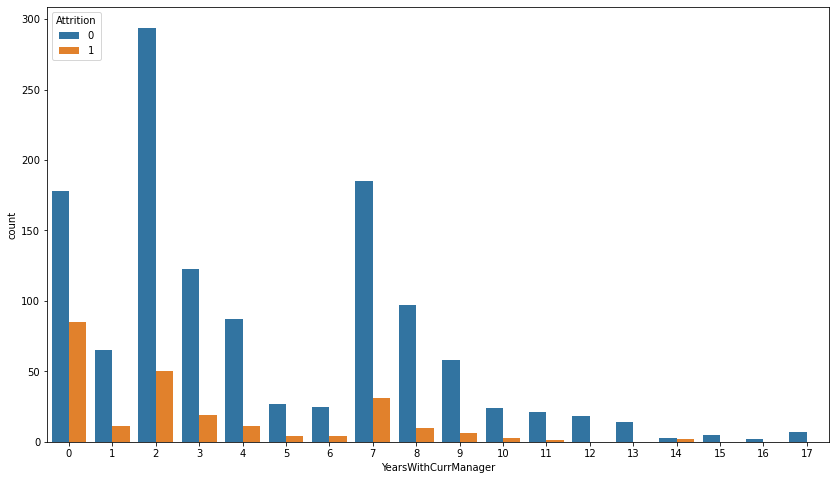

In [57]:
plt.subplots(figsize=(14,8))
sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=hr)

<AxesSubplot:>

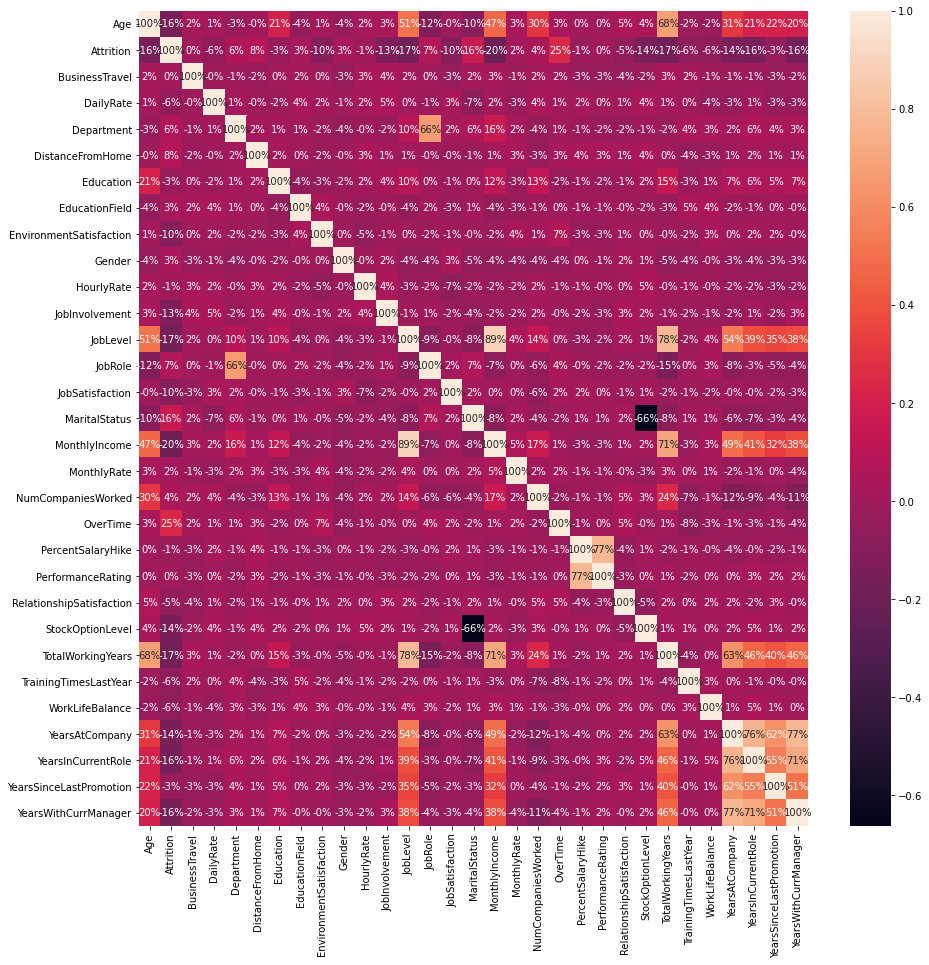

In [58]:
plt.figure(figsize=(15,15))
sns.heatmap(hr.corr(), annot=True,fmt='.0%')

<AxesSubplot:>

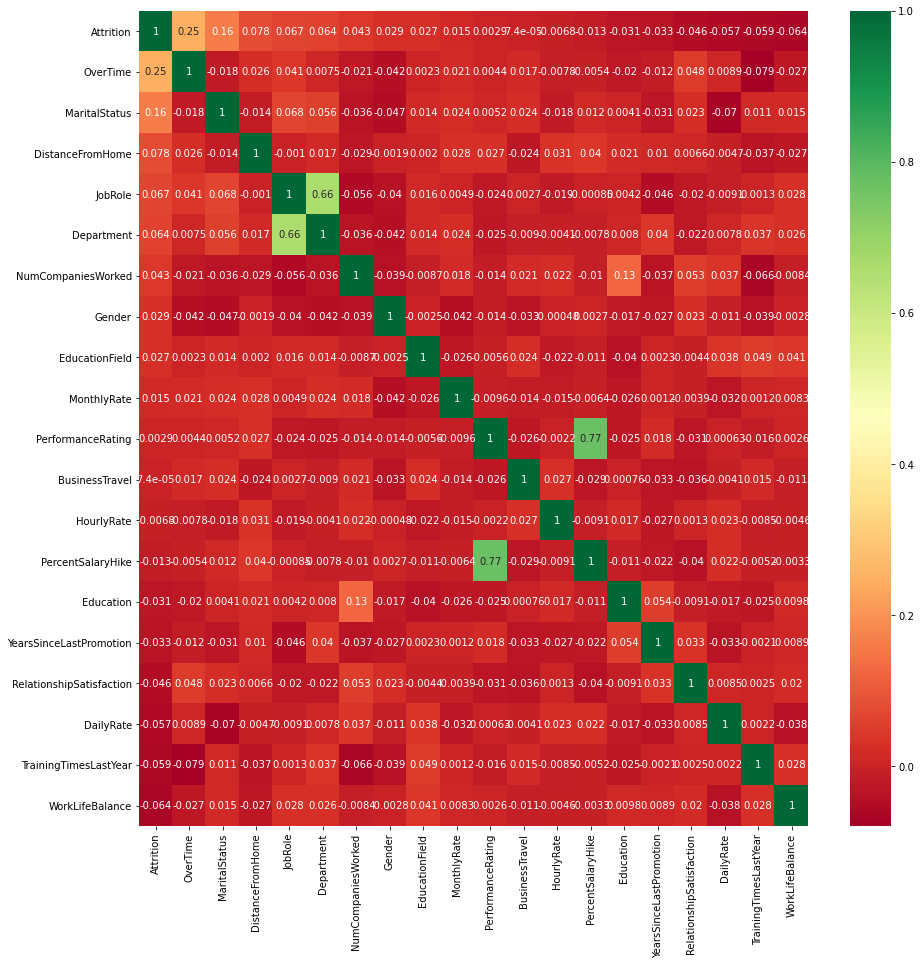

In [59]:
col = hr.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(hr[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [60]:
dummy_col = [column for column in hr.drop('Attrition', axis=1).columns if hr[column].nunique() < 20]
data = pd.get_dummies(hr, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17
dtypes: int32(1), int64(8), uint8(127)
memory usage: 280.1 KB


In [61]:
print(data.shape)

(1470, 136)


In [62]:
data=data.T.drop_duplicates()
data=data.T

In [63]:
data.drop_duplicates(inplace=True)

In [64]:
print(data.shape)

(1470, 136)


<AxesSubplot:>

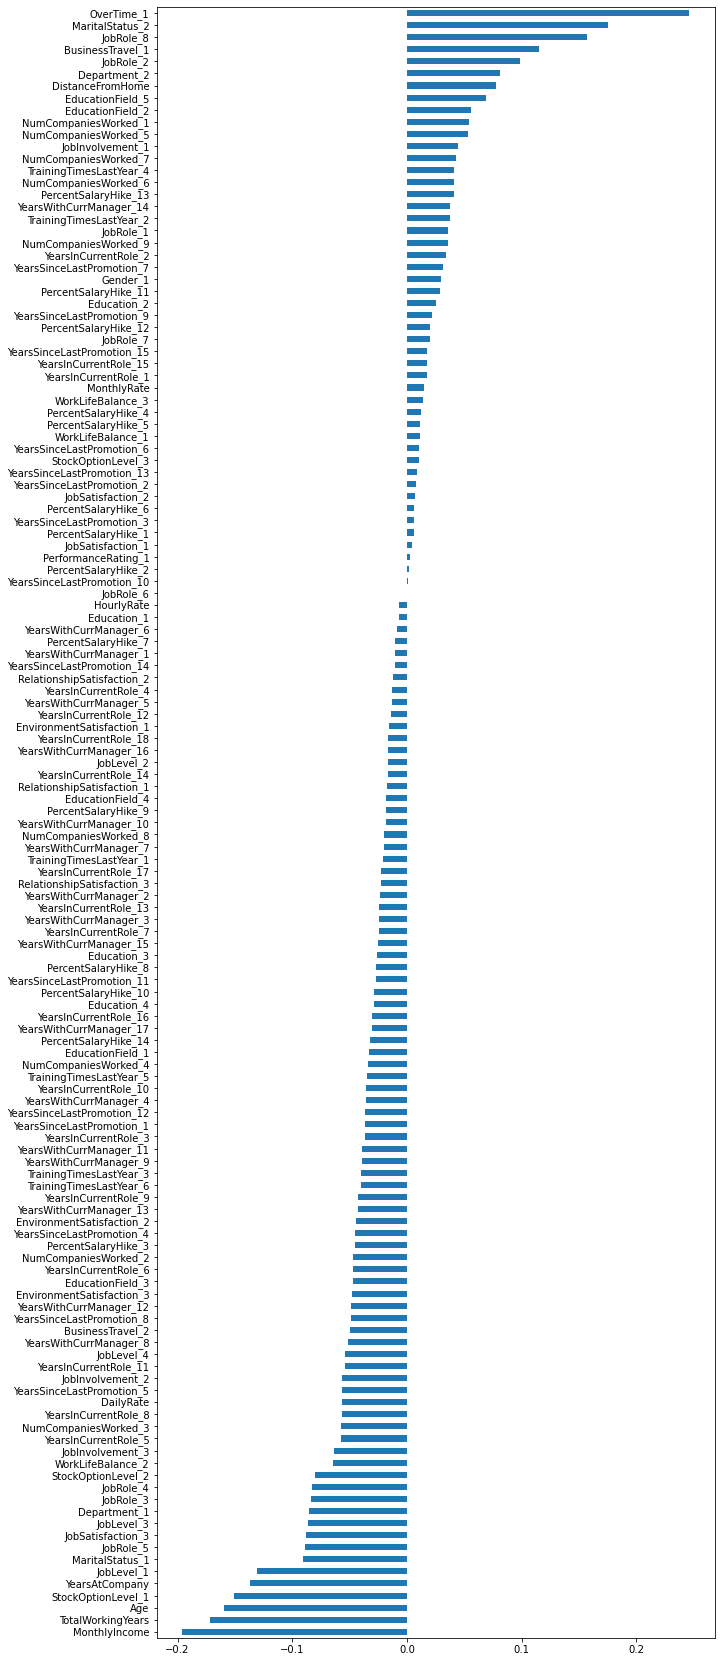

In [65]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [66]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

92

In [67]:
x= data.drop('Attrition' , axis=1)
y= data.Attrition

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=42, stratify=y)

In [69]:
x_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_1,BusinessTravel_2,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
853,1,348,8,24,203,303,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
435,15,740,14,26,1194,1316,15,7,0,1,...,0,0,0,0,0,0,0,0,0,0
587,34,771,10,52,354,1145,9,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1170,9,312,1,57,214,255,6,4,1,0,...,0,0,0,0,0,0,0,0,0,0
159,16,128,1,45,101,541,6,4,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,28,652,6,0,706,807,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0
963,20,573,1,1,915,998,11,7,0,1,...,0,0,0,0,0,0,0,0,0,0
734,4,79,7,64,180,281,4,4,0,1,...,0,0,0,0,0,0,0,0,0,0
1315,18,202,1,43,920,1006,15,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
x_test

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,TotalWorkingYears,YearsAtCompany,BusinessTravel_1,BusinessTravel_2,...,YearsWithCurrManager_8,YearsWithCurrManager_9,YearsWithCurrManager_10,YearsWithCurrManager_11,YearsWithCurrManager_12,YearsWithCurrManager_13,YearsWithCurrManager_14,YearsWithCurrManager_15,YearsWithCurrManager_16,YearsWithCurrManager_17
397,7,500,3,69,570,584,5,5,0,1,...,0,0,0,0,0,0,0,0,0,0
832,19,168,24,22,777,870,9,6,0,1,...,0,0,0,0,0,0,0,0,0,0
483,17,274,24,24,428,693,9,3,0,1,...,0,0,0,0,0,0,0,0,0,0
456,13,380,6,14,1143,1345,10,5,0,1,...,0,0,0,0,0,0,0,0,0,0
1342,16,876,3,34,1050,1304,9,5,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,20,880,1,12,26,586,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1098,22,651,7,42,485,392,8,2,0,0,...,0,0,0,0,0,0,0,0,0,0
514,15,607,2,40,381,59,10,10,1,0,...,0,0,0,0,0,0,0,0,0,0
1442,11,617,0,6,630,1384,4,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y_train

853     0
435     1
587     0
1170    0
159     0
       ..
365     0
963     0
734     0
1315    0
1292    0
Name: Attrition, Length: 1029, dtype: int64

In [72]:
y_test

397     0
832     0
483     0
456     0
1342    0
       ..
416     0
1098    0
514     1
1442    1
268     0
Name: Attrition, Length: 441, dtype: int64

In [73]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)
x_std = scaler.transform(x)

In [74]:
def feature_imp(hr, model):
    fi = pd.DataFrame()
    fi["feature"] = hr.columns
    fi["importance"] = model.feature_importances_
    return fo.sort_values(by="importance", ascending=False)

In [75]:
y_test.value_counts()[0] / y_test.shape[0]

0.8390022675736961

In [83]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

In [84]:
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Quitting Rate: {leave * 100 :.2f}%")


Staying Rate: 83.87%
Quitting Rate: 16.13%


In [80]:
stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

In [82]:
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Quitting Rate: {leave * 100 :.2f}%")

Staying Rate: 83.90%
Quitting Rate: 16.10%


In [93]:
def evaluate(model, x_train, x_test, y_train, y_test):
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    
    print("Training Results: \n")
    clf_report1 = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"Confusion Matrix:\n\n{confusion_matrix(y_train, y_train_pred)}\n")
    print(f"Accuracy:\n\n{accuracy_score(y_train, y_train_pred):.4f}\n")
    print(f"Classification:\n\n{clf_report1}\n")
    
    print("Test Results: \n")
    clf_report2 = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"Confusion Matrix:\n\n{confusion_matrix(y_test, y_test_pred)}\n")
    print(f"Accuracy:\n\n{accuracy_score(y_test, y_test_pred):.4f}\n")
    print(f"Classification:\n\n{clf_report2}\n")
    
    

In [94]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(x_train_std, y_train)
evaluate(lr_clf,x_train_std, x_test_std, y_train, y_test)

Training Results: 

Confusion Matrix:

[[849  14]
 [ 54 112]]

Accuracy:

0.9339

Classification:

                    0           1  accuracy    macro avg  weighted avg
precision    0.940199    0.888889  0.933916     0.914544      0.931922
recall       0.983778    0.674699  0.933916     0.829238      0.933916
f1-score     0.961495    0.767123  0.933916     0.864309      0.930139
support    863.000000  166.000000  0.933916  1029.000000   1029.000000

Test Results: 

Confusion Matrix:

[[352  18]
 [ 40  31]]

Accuracy:

0.8685

Classification:

                    0          1  accuracy   macro avg  weighted avg
precision    0.897959   0.632653  0.868481    0.765306      0.855245
recall       0.951351   0.436620  0.868481    0.693986      0.868481
f1-score     0.923885   0.516667  0.868481    0.720276      0.858323
support    370.000000  71.000000  0.868481  441.000000    441.000000



In [96]:
rf_clf = RandomForestClassifier(n_estimators=100,bootstrap=False)
rf_clf.fit(x_train, y_train)
evaluate(rf_clf, x_train, x_test , y_train, y_test)


Training Results: 

Confusion Matrix:

[[863   0]
 [  0 166]]

Accuracy:

1.0000

Classification:

               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

Test Results: 

Confusion Matrix:

[[359  11]
 [ 62   9]]

Accuracy:

0.8345

Classification:

                    0          1  accuracy   macro avg  weighted avg
precision    0.852732   0.450000  0.834467    0.651366      0.787893
recall       0.970270   0.126761  0.834467    0.548515      0.834467
f1-score     0.907712   0.197802  0.834467    0.552757      0.793418
support    370.000000  71.000000  0.834467  441.000000    441.000000

